(a) Usando SCOPUS (https://www.scopus.com/) obtenga un archivo CSV con al
menos 10 artículos científicos para estas palabras clave. Asegúrese de
disponer de la columna “Abstract”.

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('scopus_waldir.csv')

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df.head(2)

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,Page count,Cited by,DOI,Link,Abstract,Document Type,Publication Stage,Open Access,Source
0,Bagustari B.A.; Yazid S.; Alshehadeh A.R.,"Bagustari, Bintang Annisa (57210235140); Yazid...",57210235140; 6506236236; 57200408859,Analyzing Fog Computing Technologies for Enhan...,2023,International Journal of Advances in Soft Comp...,15,1.0,NaN,133.0,143.0,10.0,0,10.15849/IJASCA.230320.09,https://www.scopus.com/inward/record.uri?eid=2...,The use of a wireless communication network ha...,Article,Final,NaN,Scopus
1,Sneha; Singh P.D.; Tripathi V.,"Sneha (59228131200); Singh, Prabh Deep (572125...",59228131200; 57212591722; 56539389500,Utilizing round Robin scheduling for cloud-ena...,2024,AIP Conference Proceedings,3121,1.0,040011,NaN,NaN,NaN,0,10.1063/5.0221550,https://www.scopus.com/inward/record.uri?eid=2...,"In higher learning, cloud computing has become...",Conference paper,Final,NaN,Scopus


In [9]:
df["Abstract"]

,Abstract
0,The use of a wireless communication network ha...
1,"In higher learning, cloud computing has become..."
2,The intersection of education and technology h...
3,Cloud Computing (CC) and virtualization concep...
4,"In the context of the era of big data, the edu..."
5,FOG COMPUTING FOR INTELLIGENT CLOUD IOT SYSTEM...
6,The primary goal of the study is to optimize a...
7,The intersection between technology and educat...
8,"In our fast-paced society, due to the intercon..."
9,With the rapid development of Internet technol...


In [10]:
df.shape

(10, 20)

(b) Usando matplotlib y/o seaborn grafique un diagrama de barras con los
tipos de publicación versus la cantidad.

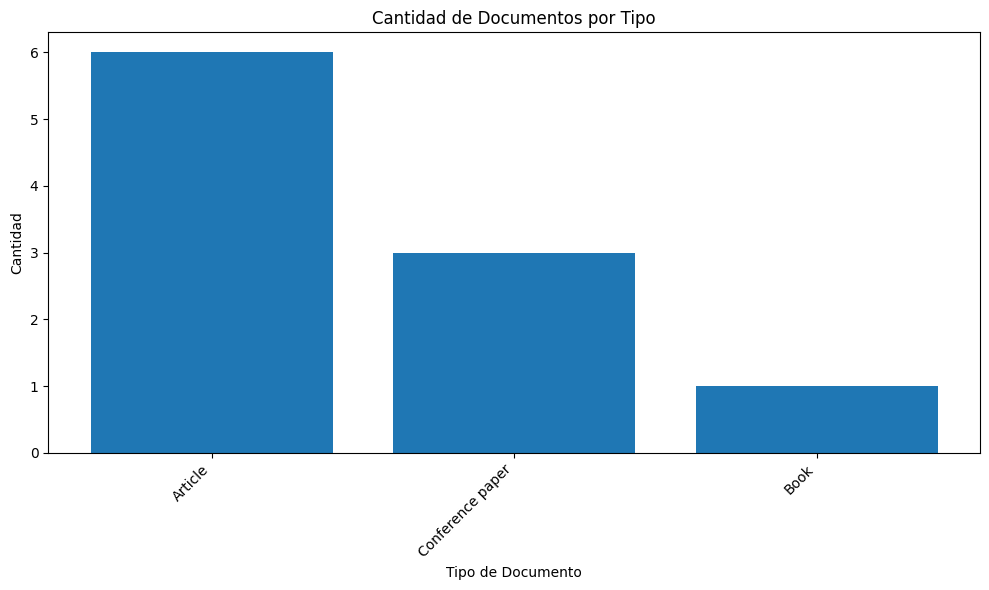

In [11]:
# prompt: haz una grafica de barras con matplotlib mostrando los tipos de documentos y la cantidad

import matplotlib.pyplot as plt

# Contar la cantidad de cada tipo de documento
doc_counts = df['Document Type'].value_counts()

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
plt.bar(doc_counts.index, doc_counts.values)
plt.xlabel('Tipo de Documento')
plt.ylabel('Cantidad')
plt.title('Cantidad de Documentos por Tipo')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para una mejor visualización
plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se superpongan
plt.show()


(c) Usando Missingno evalúe si existen datos faltantes.

In [12]:
import missingno as msno

<Axes: >

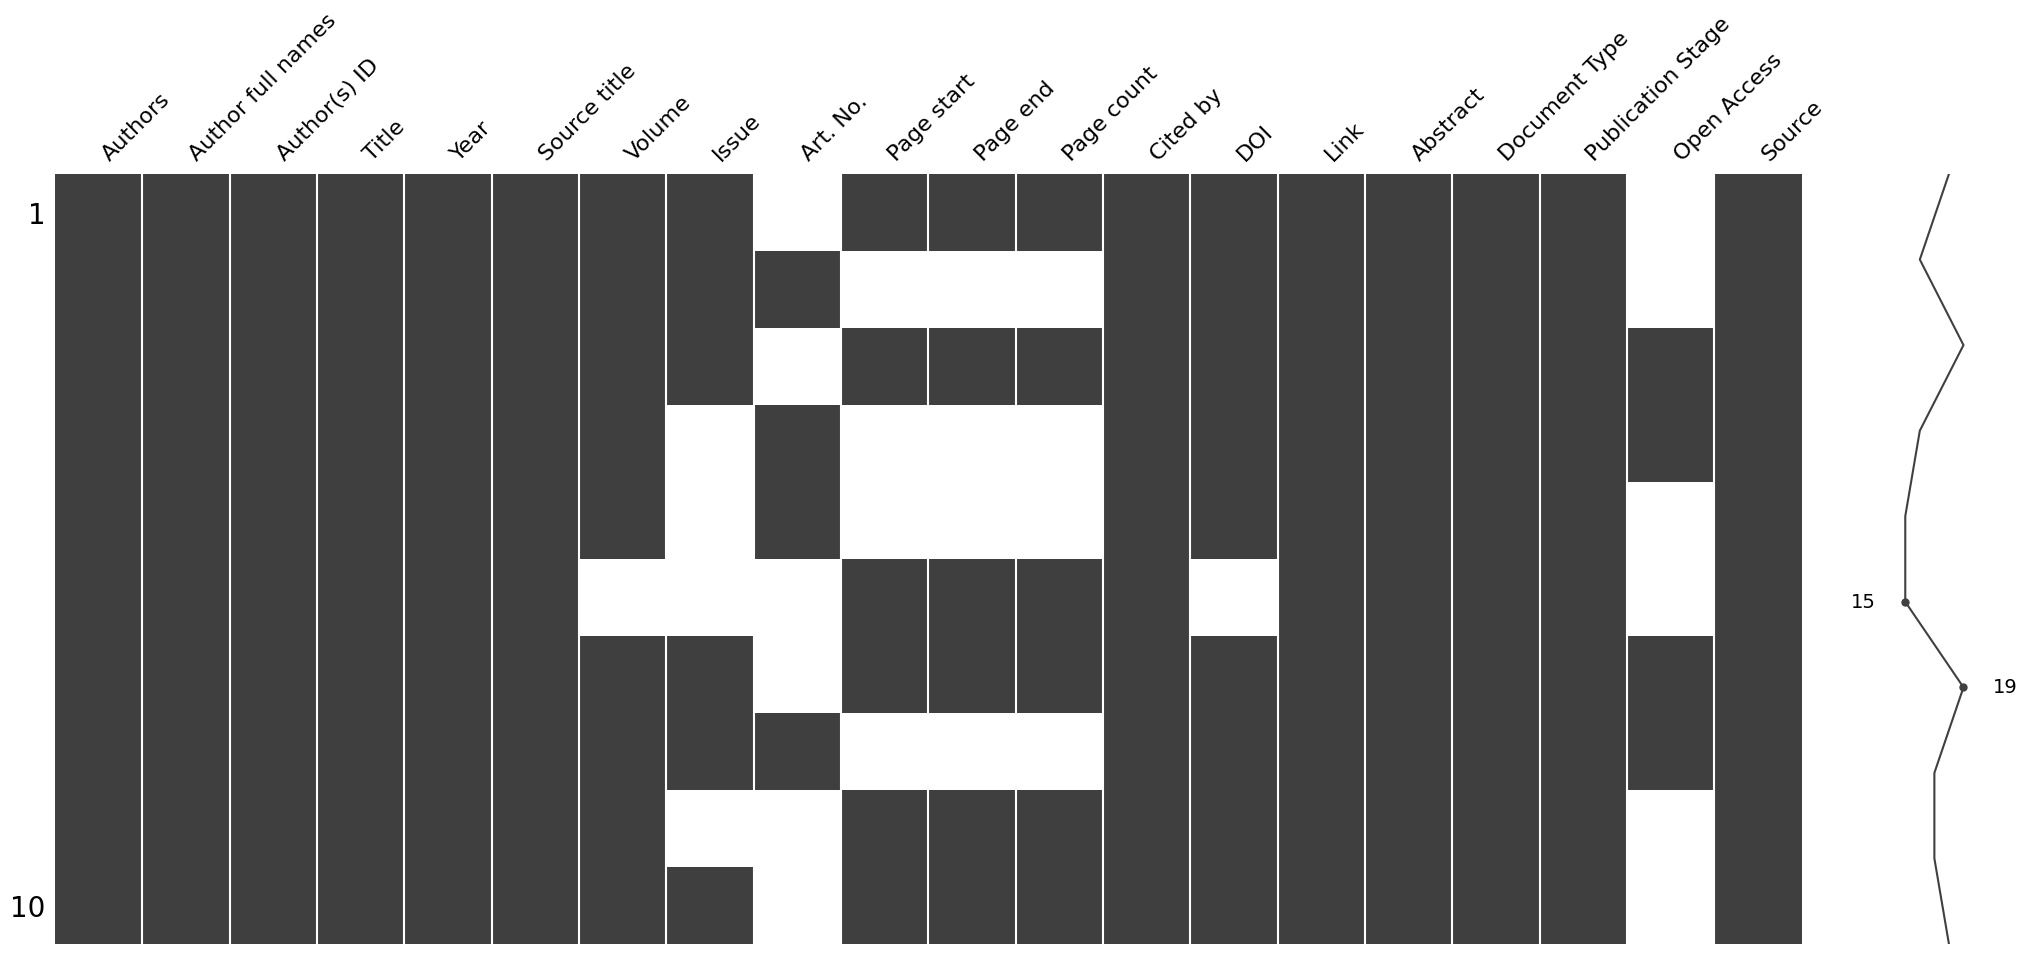

In [13]:
msno.matrix(df)

Pregunta 3: (8 puntos)
(a) Elabore una lista de python con 3 preguntas dirigidas al abstract.


INSTALACIONES

In [2]:
%%capture
!pip install -U "transformers==4.40.0" --upgrade
!pip install -i https://pypi.org/simple/ bitsandbytes
!pip install accelerate

Cargando LLAMA3

In [3]:
#@title Cargando LLAMA3
import transformers
import torch

model_id = "unsloth/llama-3-8b-Instruct-bnb-4bit"

pipeline = transformers.pipeline(
    "text-generation",
    model=model_id,
    model_kwargs={
        "torch_dtype": torch.float16,
        "quantization_config": {"load_in_4bit": True},
        "low_cpu_mem_usage": True,
    },
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.26k [00:00<?, ?B/s]

Unused kwargs: ['_load_in_4bit', '_load_in_8bit', 'quant_method']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.
/usr/local/lib/python3.10/dist-packages/transformers/quantizers/auto.py:159: UserWarning: You passed `quantization_config` or equivalent parameters to `from_pretrained` but the model you're loading already has a `quantization_config` attribute. The `quantization_config` from the model will be used.
  warnings.warn(warning_msg)


model.safetensors:   0%|          | 0.00/5.70G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/220 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/51.1k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [14]:
df["Abstract"]

,Abstract
0,The use of a wireless communication network ha...
1,"In higher learning, cloud computing has become..."
2,The intersection of education and technology h...
3,Cloud Computing (CC) and virtualization concep...
4,"In the context of the era of big data, the edu..."
5,FOG COMPUTING FOR INTELLIGENT CLOUD IOT SYSTEM...
6,The primary goal of the study is to optimize a...
7,The intersection between technology and educat...
8,"In our fast-paced society, due to the intercon..."
9,With the rapid development of Internet technol...


In [16]:
type(df["Abstract"][4])

str

In [24]:
def consultas(input):
  messages = [
    {"role"   : "system",
     "content": context1},
    {"role"   : "user",
     "content": "Eres un especialista en Ecommerce y en Gestión universitaria, dime unicamente la virtud más importante del empleo de un Ecommerce en: "},
  ]

  prompt = pipeline.tokenizer.apply_chat_template(
          messages,
          tokenize=False,
          add_generation_prompt=True
  )

  terminators = [
      pipeline.tokenizer.eos_token_id,
      pipeline.tokenizer.convert_tokens_to_ids("<|eot_id|>")
  ]

  outputs = pipeline(
      prompt,
      max_new_tokens=256,
      eos_token_id=terminators,
      do_sample=True,
      temperature=0.6,
      top_p=0.9,
  )

  return outputs[0]["generated_text"][len(prompt):]

In [25]:
context1 = df["Abstract"][1]

In [26]:
consultas(context1)

'Como especialista en Ecommerce y Gestión universitaria, considero que la virtud más importante del empleo de un Ecommerce es:\n\n**Accesibilidad global**: un Ecommerce permite vender productos a clientes de todo el mundo, sin importar la ubicación geográfica.\n\nEsta virtud es fundamental porque permite a las empresas alcanzar un público más amplio y aumentar sus ventas, lo que puede generar un crecimiento significativo y sostenible en el negocio.'

In [27]:
df['Abstract'] = None

for i in range(6):
  context1 = df["Abstract"][i]
  response = consultas(context1)
  df['Abstract'][i] = response

<ipython-input-27-593ab47a9530>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Abstract'][i] = response
<ipython-input-27-593ab47a9530>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Abstract'][i] = response
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
<ipython-input-27-593ab47a9530>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Abstract'][i] = response


In [29]:
df["Abstract"][0]

'En mi opinión, la virtud más importante del empleo de un Ecommerce es su capacidad para aumentar la accesibilidad y la flexibilidad en la venta de productos o servicios, permitiendo a las empresas llegar a un público más amplio y diverso, y a los clientes comprar de manera más cómoda y segura.'

In [30]:
df["Abstract"][1]

'La virtud más importante del empleo de un Ecommerce es su capacidad para ampliar la audiencia y el alcance de la universidad, permitiendo la venta de productos y servicios a estudiantes y profesores de cualquier lugar del mundo, lo que puede generar una mayor cantidad de ingresos y una mayor visibilidad para la institución.'

In [31]:
df["Abstract"][2]

'La virtud más importante del empleo de un ecommerce es la flexibilidad y capacidad para adaptarse a los cambios en el mercado y en las necesidades de los clientes. Al ser una plataforma en línea, un ecommerce puede fácilmente actualizar su oferta, cambiar precios, ofrecer promociones y promover nuevos productos, lo que le permite responder de manera rápida y eficiente a las tendencias y preferencias de los consumidores.'

In [33]:
context1 = df["Abstract"][3]

In [34]:
consultas(context1)


'Flexibilidad y accesibilidad.'

(b) Disponga de LLAMA y realice estas consultas almacenando las
respuestas en archivos de texto o en el mismo DataFrame de pandas (según
le convenga)


In [39]:
df['Virtud'] = None

for i in range(6):
  context1 = df["Abstract"][i]
  response = consultas(context1)
  df['Virtud'][i] = response

<ipython-input-39-b7f2f0491916>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Virtud'][i] = response
<ipython-input-39-b7f2f0491916>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Virtud'][i] = response
<ipython-input-39-b7f2f0491916>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Virtud'][i] = response
<ipython-input-39-b7f2f0491916>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [41]:
df

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,Cited by,DOI,Link,Abstract,Document Type,Publication Stage,Open Access,Source,Virtudes,Virtud
0,Bagustari B.A.; Yazid S.; Alshehadeh A.R.,"Bagustari, Bintang Annisa (57210235140); Yazid...",57210235140; 6506236236; 57200408859,Analyzing Fog Computing Technologies for Enhan...,2023,International Journal of Advances in Soft Comp...,15,1.0,NaN,133.0,...,0,10.15849/IJASCA.230320.09,https://www.scopus.com/inward/record.uri?eid=2...,La virtud más importante del empleo de un Ecom...,Article,Final,NaN,Scopus,None,La virtud más importante del empleo de un Ecom...
1,Sneha; Singh P.D.; Tripathi V.,"Sneha (59228131200); Singh, Prabh Deep (572125...",59228131200; 57212591722; 56539389500,Utilizing round Robin scheduling for cloud-ena...,2024,AIP Conference Proceedings,3121,1.0,040011,NaN,...,0,10.1063/5.0221550,https://www.scopus.com/inward/record.uri?eid=2...,La virtud más importante del empleo de un Ecom...,Conference paper,Final,NaN,Scopus,None,La virtud más importante del empleo de un Ecom...
2,Liu L.,"Liu, Li (58904505000)",58904505000,Current Situation and Innovative Methods of Br...,2024,Journal of Electrical Systems,20,1.0,NaN,294.0,...,1,10.52783/jes.683,https://www.scopus.com/inward/record.uri?eid=2...,La virtud más importante del empleo de un ecom...,Article,Final,All Open Access; Hybrid Gold Open Access,Scopus,None,La virtud más importante del empleo de un ecom...
3,Rehaimi A.; Sadqi Y.; Maleh Y.; Gaba G.S.; Gur...,"Rehaimi, Abdeslam (58124315700); Sadqi, Yassin...",58124315700; 56321092500; 56780201500; 5502722...,Towards a federated and hybrid cloud computing...,2024,Expert Systems with Applications,252,NaN,124267,NaN,...,0,10.1016/j.eswa.2024.124267,https://www.scopus.com/inward/record.uri?eid=2...,Flexibilidad y accesibilidad.,Article,Final,All Open Access; Hybrid Gold Open Access,Scopus,None,"Como especialista en Ecommerce, te diré que la..."
4,Chen L.,"Chen, Lihui (58635575000)",58635575000,The Innovation Mode and Path Analysis of Engli...,2023,Proceedings of SPIE - The International Societ...,12625,NaN,126251Y,NaN,...,0,10.1117/12.2670408,https://www.scopus.com/inward/record.uri?eid=2...,La virtud más importante del empleo de un Ecom...,Conference paper,Final,NaN,Scopus,None,La virtud más importante del empleo de un Ecom...
5,Banerjee C.; Ghosh A.; Chakraborty R.; Elngar ...,"Banerjee, Chandan (57196678615); Ghosh, Anupam...",57196678615; 57207840134; 22978148400; 5891866...,Fog Computing for Intelligent Cloud IoT Systems,2024,Fog Computing for Intelligent Cloud IoT Systems,NaN,NaN,NaN,1.0,...,0,NaN,https://www.scopus.com/inward/record.uri?eid=2...,La virtud más importante del empleo de un Ecom...,Book,Final,NaN,Scopus,None,La virtud más importante del empleo de un Ecom...
6,Caytuiro-Silva N.E.; Maraza-Quispe B.; Castro-...,"Caytuiro-Silva, Nicolas Esleyder (57214230737)...",57214230737; 57212024148; 58152837700; 5720185...,Optimizing Attendance Management in Educationa...,2024,International Journal of Interactive Mobile Te...,18,12.0,NaN,112.0,...,0,10.3991/ijim.v18i12.46917,https://www.scopus.com/inward/record.uri?eid=2...,None,Article,Final,All Open Access; Gold Open Access,Scopus,None,None
7,Govea J.; Ocampo Edye E.; Revelo-Tapia S.; Vil...,"Govea, Jaime (58186229100); Ocampo Edye, Ernes...",58186229100; 36997206000; 58647605400; 5719440...,Optimization and Scalability of Educational Pl...,2023,Computers,12,11.0,223,NaN,...,3,10.3390/computers12110223,https://www.scopus.com/inward/record.uri?eid=2...,None,Article,Final,All Open Access; Gold Open Access,Scopus,None,None
8,Tsouplaki A.,"Tsouplaki, Asimina (58399161300)",58399161300,Internet of Cloud (IoC): The Need of Raising P...,2023,Lecture Notes in Business Information Processing,476 LNBIP,NaN,NaN,542.0,...,1,10.1007/978-3-031-33080-3_36,https://www.scopus.com/inward/record.uri?eid=2...,None,Conference paper,Final,NaN,Scopus,None,None
9,Cao H.,"Cao, Hong (5776955580

In [43]:
def score(input):
  messages = [
    {"role"   : "system",
     "content": context1},
    {"role"   : "user",
     "content": "Eres un especialista en Ecommerce y en Gestión universitaria, dime unicamente la virtud más importante del empleo de un Ecommerce en:"},
  ]

  prompt = pipeline.tokenizer.apply_chat_template(
          messages,
          tokenize=False,
          add_generation_prompt=True
  )

  terminators = [
      pipeline.tokenizer.eos_token_id,
      pipeline.tokenizer.convert_tokens_to_ids("<|eot_id|>")
  ]

  outputs = pipeline(
      prompt,
      max_new_tokens=256,
      eos_token_id=terminators,
      do_sample=True,
      temperature=0.6,
      top_p=0.9,
  )

  return outputs[0]["generated_text"][len(prompt):]


df['Score_1'] = None

for i in range(6):
  context1 = df["Abstract"][i]
  response = score(context1)
  df['Score_1'][i] = response

<ipython-input-43-c38e72d87e44>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Score_1'][i] = response
<ipython-input-43-c38e72d87e44>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Score_1'][i] = response
<ipython-input-43-c38e72d87e44>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Score_1'][i] = response
<ipython-input-43-c38e72d87e44>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [44]:
df

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,DOI,Link,Abstract,Document Type,Publication Stage,Open Access,Source,Virtudes,Virtud,Score_1
0,Bagustari B.A.; Yazid S.; Alshehadeh A.R.,"Bagustari, Bintang Annisa (57210235140); Yazid...",57210235140; 6506236236; 57200408859,Analyzing Fog Computing Technologies for Enhan...,2023,International Journal of Advances in Soft Comp...,15,1.0,NaN,133.0,...,10.15849/IJASCA.230320.09,https://www.scopus.com/inward/record.uri?eid=2...,La virtud más importante del empleo de un Ecom...,Article,Final,NaN,Scopus,None,La virtud más importante del empleo de un Ecom...,La virtud más importante del empleo de un Ecom...
1,Sneha; Singh P.D.; Tripathi V.,"Sneha (59228131200); Singh, Prabh Deep (572125...",59228131200; 57212591722; 56539389500,Utilizing round Robin scheduling for cloud-ena...,2024,AIP Conference Proceedings,3121,1.0,040011,NaN,...,10.1063/5.0221550,https://www.scopus.com/inward/record.uri?eid=2...,La virtud más importante del empleo de un Ecom...,Conference paper,Final,NaN,Scopus,None,La virtud más importante del empleo de un Ecom...,La virtud más importante del empleo de un Ecom...
2,Liu L.,"Liu, Li (58904505000)",58904505000,Current Situation and Innovative Methods of Br...,2024,Journal of Electrical Systems,20,1.0,NaN,294.0,...,10.52783/jes.683,https://www.scopus.com/inward/record.uri?eid=2...,La virtud más importante del empleo de un ecom...,Article,Final,All Open Access; Hybrid Gold Open Access,Scopus,None,La virtud más importante del empleo de un ecom...,La virtud más importante del empleo de un ecom...
3,Rehaimi A.; Sadqi Y.; Maleh Y.; Gaba G.S.; Gur...,"Rehaimi, Abdeslam (58124315700); Sadqi, Yassin...",58124315700; 56321092500; 56780201500; 5502722...,Towards a federated and hybrid cloud computing...,2024,Expert Systems with Applications,252,NaN,124267,NaN,...,10.1016/j.eswa.2024.124267,https://www.scopus.com/inward/record.uri?eid=2...,Flexibilidad y accesibilidad.,Article,Final,All Open Access; Hybrid Gold Open Access,Scopus,None,"Como especialista en Ecommerce, te diré que la...",Como especialista en Ecommerce y Gestión unive...
4,Chen L.,"Chen, Lihui (58635575000)",58635575000,The Innovation Mode and Path Analysis of Engli...,2023,Proceedings of SPIE - The International Societ...,12625,NaN,126251Y,NaN,...,10.1117/12.2670408,https://www.scopus.com/inward/record.uri?eid=2...,La virtud más importante del empleo de un Ecom...,Conference paper,Final,NaN,Scopus,None,La virtud más importante del empleo de un Ecom...,La virtud más importante del empleo de un Ecom...
5,Banerjee C.; Ghosh A.; Chakraborty R.; Elngar ...,"Banerjee, Chandan (57196678615); Ghosh, Anupam...",57196678615; 57207840134; 22978148400; 5891866...,Fog Computing for Intelligent Cloud IoT Systems,2024,Fog Computing for Intelligent Cloud IoT Systems,NaN,NaN,NaN,1.0,...,NaN,https://www.scopus.com/inward/record.uri?eid=2...,La virtud más importante del empleo de un Ecom...,Book,Final,NaN,Scopus,None,La virtud más importante del empleo de un Ecom...,La virtud más importante del empleo de un Ecom...
6,Caytuiro-Silva N.E.; Maraza-Quispe B.; Castro-...,"Caytuiro-Silva, Nicolas Esleyder (57214230737)...",57214230737; 57212024148; 58152837700; 5720185...,Optimizing Attendance Management in Educationa...,2024,International Journal of Interactive Mobile Te...,18,12.0,NaN,112.0,...,10.3991/ijim.v18i12.46917,https://www.scopus.com/inward/record.uri?eid=2...,None,Article,Final,All Open Access; Gold Open Access,Scopus,None,None,None
7,Govea J.; Ocampo Edye E.; Revelo-Tapia S.; Vil...,"Govea, Jaime (58186229100); Ocampo Edye, Ernes...",58186229100; 36997206000; 58647605400; 5719440...,Optimization and Scalability of Educational Pl...,2023,Computers,12,11.0,223,NaN,...,10.3390/computers12110223,https://www.scopus.com/inward/record.uri?eid=2...,None,Article,Final,All Open Access; Gold Open Access,Scopus,None,None,None
8,Tsouplaki A.,"Tsouplaki, Asimina (58399161300)",58399161300,

In [45]:
df['Score_1'] = None

for i in range(6):
  context1 = df["Abstract"][i]
  response = score(context1)
  df['Score_1'][i] = response

<ipython-input-45-15101965f5b7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Score_1'][i] = response
<ipython-input-45-15101965f5b7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Score_1'][i] = response
<ipython-input-45-15101965f5b7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Score_1'][i] = response
<ipython-input-45-15101965f5b7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [46]:
df

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,DOI,Link,Abstract,Document Type,Publication Stage,Open Access,Source,Virtudes,Virtud,Score_1
0,Bagustari B.A.; Yazid S.; Alshehadeh A.R.,"Bagustari, Bintang Annisa (57210235140); Yazid...",57210235140; 6506236236; 57200408859,Analyzing Fog Computing Technologies for Enhan...,2023,International Journal of Advances in Soft Comp...,15,1.0,NaN,133.0,...,10.15849/IJASCA.230320.09,https://www.scopus.com/inward/record.uri?eid=2...,La virtud más importante del empleo de un Ecom...,Article,Final,NaN,Scopus,None,La virtud más importante del empleo de un Ecom...,La virtud más importante del empleo de un Ecom...
1,Sneha; Singh P.D.; Tripathi V.,"Sneha (59228131200); Singh, Prabh Deep (572125...",59228131200; 57212591722; 56539389500,Utilizing round Robin scheduling for cloud-ena...,2024,AIP Conference Proceedings,3121,1.0,040011,NaN,...,10.1063/5.0221550,https://www.scopus.com/inward/record.uri?eid=2...,La virtud más importante del empleo de un Ecom...,Conference paper,Final,NaN,Scopus,None,La virtud más importante del empleo de un Ecom...,La virtud más importante del empleo de un Ecom...
2,Liu L.,"Liu, Li (58904505000)",58904505000,Current Situation and Innovative Methods of Br...,2024,Journal of Electrical Systems,20,1.0,NaN,294.0,...,10.52783/jes.683,https://www.scopus.com/inward/record.uri?eid=2...,La virtud más importante del empleo de un ecom...,Article,Final,All Open Access; Hybrid Gold Open Access,Scopus,None,La virtud más importante del empleo de un ecom...,La virtud más importante del empleo de un ecom...
3,Rehaimi A.; Sadqi Y.; Maleh Y.; Gaba G.S.; Gur...,"Rehaimi, Abdeslam (58124315700); Sadqi, Yassin...",58124315700; 56321092500; 56780201500; 5502722...,Towards a federated and hybrid cloud computing...,2024,Expert Systems with Applications,252,NaN,124267,NaN,...,10.1016/j.eswa.2024.124267,https://www.scopus.com/inward/record.uri?eid=2...,Flexibilidad y accesibilidad.,Article,Final,All Open Access; Hybrid Gold Open Access,Scopus,None,"Como especialista en Ecommerce, te diré que la...","En mi opinión, la virtud más importante del em..."
4,Chen L.,"Chen, Lihui (58635575000)",58635575000,The Innovation Mode and Path Analysis of Engli...,2023,Proceedings of SPIE - The International Societ...,12625,NaN,126251Y,NaN,...,10.1117/12.2670408,https://www.scopus.com/inward/record.uri?eid=2...,La virtud más importante del empleo de un Ecom...,Conference paper,Final,NaN,Scopus,None,La virtud más importante del empleo de un Ecom...,La virtud más importante del empleo de un Ecom...
5,Banerjee C.; Ghosh A.; Chakraborty R.; Elngar ...,"Banerjee, Chandan (57196678615); Ghosh, Anupam...",57196678615; 57207840134; 22978148400; 5891866...,Fog Computing for Intelligent Cloud IoT Systems,2024,Fog Computing for Intelligent Cloud IoT Systems,NaN,NaN,NaN,1.0,...,NaN,https://www.scopus.com/inward/record.uri?eid=2...,La virtud más importante del empleo de un Ecom...,Book,Final,NaN,Scopus,None,La virtud más importante del empleo de un Ecom...,La virtud más importante del empleo de un Ecom...
6,Caytuiro-Silva N.E.; Maraza-Quispe B.; Castro-...,"Caytuiro-Silva, Nicolas Esleyder (57214230737)...",57214230737; 57212024148; 58152837700; 5720185...,Optimizing Attendance Management in Educationa...,2024,International Journal of Interactive Mobile Te...,18,12.0,NaN,112.0,...,10.3991/ijim.v18i12.46917,https://www.scopus.com/inward/record.uri?eid=2...,None,Article,Final,All Open Access; Gold Open Access,Scopus,None,None,None
7,Govea J.; Ocampo Edye E.; Revelo-Tapia S.; Vil...,"Govea, Jaime (58186229100); Ocampo Edye, Ernes...",58186229100; 36997206000; 58647605400; 5719440...,Optimization and Scalability of Educational Pl...,2023,Computers,12,11.0,223,NaN,...,10.3390/computers12110223,https://www.scopus.com/inward/record.uri?eid=2...,None,Article,Final,All Open Access; Gold Open Access,Scopus,None,None,None
8,Tsouplaki A.,"Tsouplaki, Asimina (58399161300)",5839916130

(c) Asigne un indicador numérico (como por ejemplo un puntaje) para luego
filtrar su dataset.


In [48]:
df

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,DOI,Link,Abstract,Document Type,Publication Stage,Open Access,Source,Virtudes,Virtud,Score_1
0,Bagustari B.A.; Yazid S.; Alshehadeh A.R.,"Bagustari, Bintang Annisa (57210235140); Yazid...",57210235140; 6506236236; 57200408859,Analyzing Fog Computing Technologies for Enhan...,2023,International Journal of Advances in Soft Comp...,15,1.0,NaN,133.0,...,10.15849/IJASCA.230320.09,https://www.scopus.com/inward/record.uri?eid=2...,La virtud más importante del empleo de un Ecom...,Article,Final,NaN,Scopus,None,La virtud más importante del empleo de un Ecom...,La virtud más importante del empleo de un Ecom...
1,Sneha; Singh P.D.; Tripathi V.,"Sneha (59228131200); Singh, Prabh Deep (572125...",59228131200; 57212591722; 56539389500,Utilizing round Robin scheduling for cloud-ena...,2024,AIP Conference Proceedings,3121,1.0,040011,NaN,...,10.1063/5.0221550,https://www.scopus.com/inward/record.uri?eid=2...,La virtud más importante del empleo de un Ecom...,Conference paper,Final,NaN,Scopus,None,La virtud más importante del empleo de un Ecom...,La virtud más importante del empleo de un Ecom...
2,Liu L.,"Liu, Li (58904505000)",58904505000,Current Situation and Innovative Methods of Br...,2024,Journal of Electrical Systems,20,1.0,NaN,294.0,...,10.52783/jes.683,https://www.scopus.com/inward/record.uri?eid=2...,La virtud más importante del empleo de un ecom...,Article,Final,All Open Access; Hybrid Gold Open Access,Scopus,None,La virtud más importante del empleo de un ecom...,La virtud más importante del empleo de un ecom...
3,Rehaimi A.; Sadqi Y.; Maleh Y.; Gaba G.S.; Gur...,"Rehaimi, Abdeslam (58124315700); Sadqi, Yassin...",58124315700; 56321092500; 56780201500; 5502722...,Towards a federated and hybrid cloud computing...,2024,Expert Systems with Applications,252,NaN,124267,NaN,...,10.1016/j.eswa.2024.124267,https://www.scopus.com/inward/record.uri?eid=2...,Flexibilidad y accesibilidad.,Article,Final,All Open Access; Hybrid Gold Open Access,Scopus,None,"Como especialista en Ecommerce, te diré que la...","En mi opinión, la virtud más importante del em..."
4,Chen L.,"Chen, Lihui (58635575000)",58635575000,The Innovation Mode and Path Analysis of Engli...,2023,Proceedings of SPIE - The International Societ...,12625,NaN,126251Y,NaN,...,10.1117/12.2670408,https://www.scopus.com/inward/record.uri?eid=2...,La virtud más importante del empleo de un Ecom...,Conference paper,Final,NaN,Scopus,None,La virtud más importante del empleo de un Ecom...,La virtud más importante del empleo de un Ecom...
5,Banerjee C.; Ghosh A.; Chakraborty R.; Elngar ...,"Banerjee, Chandan (57196678615); Ghosh, Anupam...",57196678615; 57207840134; 22978148400; 5891866...,Fog Computing for Intelligent Cloud IoT Systems,2024,Fog Computing for Intelligent Cloud IoT Systems,NaN,NaN,NaN,1.0,...,NaN,https://www.scopus.com/inward/record.uri?eid=2...,La virtud más importante del empleo de un Ecom...,Book,Final,NaN,Scopus,None,La virtud más importante del empleo de un Ecom...,La virtud más importante del empleo de un Ecom...
6,Caytuiro-Silva N.E.; Maraza-Quispe B.; Castro-...,"Caytuiro-Silva, Nicolas Esleyder (57214230737)...",57214230737; 57212024148; 58152837700; 5720185...,Optimizing Attendance Management in Educationa...,2024,International Journal of Interactive Mobile Te...,18,12.0,NaN,112.0,...,10.3991/ijim.v18i12.46917,https://www.scopus.com/inward/record.uri?eid=2...,None,Article,Final,All Open Access; Gold Open Access,Scopus,None,None,None
7,Govea J.; Ocampo Edye E.; Revelo-Tapia S.; Vil...,"Govea, Jaime (58186229100); Ocampo Edye, Ernes...",58186229100; 36997206000; 58647605400; 5719440...,Optimization and Scalability of Educational Pl...,2023,Computers,12,11.0,223,NaN,...,10.3390/computers12110223,https://www.scopus.com/inward/record.uri?eid=2...,None,Article,Final,All Open Access; Gold Open Access,Scopus,None,None,None
8,Tsouplaki A.,"Tsouplaki, Asimina (58399161300)",5839916130

(d) Guarde su DataFrame inicial y final en archivos en formato CSV y
adjunte en su Github